In [1]:

from core.core_log import setup_logging, get_logger
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
from core.database import SensorDataHandler
from core.plotting import PlotData, SupportedDataFrames, draw_complete_summary
from core.util import create_timelapse
from core.sensors.camera import RpiCamController, DIMENSION_FULL_HD, DIMENSION_CAMERA_DEFAULT
from core.sensors.dht import get_sensor_data
from core.core_configuration import load_config, database_config, hometemp_config

setup_logging()
load_config()
log = get_logger(__name__)

In [2]:
#live_sensor_data = get_sensor_data(int(hometemp_config()["sensor_pin"]), True)
#live_sensor_data

In [3]:
rpi_cam = RpiCamController()
#name = f'pictures/{datetime.now().strftime("%Y-%m-%d-%H:%M:%S")}'
name = "current"
#rpi_cam.capture_image(file_path=name)
#create_timelapse('./pictures', 'timelapse.mp4')

In [4]:
auth = database_config()
handler = SensorDataHandler(auth['db_port'], auth['db_host'], auth['db_user'], auth['db_pw'], 'sensor_data')
handler.init_db_connection(check_table=False)
df = handler.read_data_into_dataframe()
df['timestamp'] = df['timestamp'].map(lambda x : datetime.strptime(str(x).replace("+00:00", "").strip(), '%Y-%m-%d %H:%M:%S'))
df = df.sort_values(by='timestamp')
df = df.reset_index()

# 1. Automation: 3 Sep 2024 19:15 to 29 Nov 2024 16:10
#df = df[(df['timestamp'] >= datetime(year=2024, month=9, day=3, hour=19)) & (df['timestamp'] <= datetime(year=2024, month=11, day=29, hour=16))]
df

,index,id,timestamp,humidity,room_temp,cpu_temp
0,0,1,2024-08-27 19:05:19,65.0,21.8,34.076
1,1,2,2024-08-27 19:15:23,66.0,21.5,33.102
2,2,3,2024-08-27 19:25:29,67.0,21.3,32.615
3,3,4,2024-08-27 19:35:36,68.0,21.2,34.076
4,4,5,2024-08-27 21:07:56,67.0,21.1,37.972
...,...,...,...,...,...,...
21096,21096,21097,2025-01-25 12:21:03,47.0,13.2,27.258
21097,21097,21098,2025-01-25 12:31:06,47.0,13.2,23.849
21098,21098,21099,2025-01-25 12:41:08,47.0,13.2,22.388
21099,21099,21100,2025-01-25 12:51:13,47.0,13.1,22.388


In [5]:
df[["humidity", "room_temp", "cpu_temp"]].describe()

,humidity,room_temp,cpu_temp
count,21101.000000,21101.000000,21101.000000
mean,48.001753,19.072053,28.403873
std,9.449268,4.866735,4.483777
min,25.000000,11.100000,20.440000
25%,42.000000,14.400000,24.823000
50%,46.000000,19.200000,27.745000
75%,54.000000,23.100000,32.128000
max,82.000000,30.100000,42.842000


In [6]:
corr_matrix = df[["humidity", "room_temp", "cpu_temp"]].corr()
#corr_matrix = df[["humidity", "room_temp"]].corr()
corr_matrix

,humidity,room_temp,cpu_temp
humidity,1.000000,0.351533,0.297809
room_temp,0.351533,1.000000,0.949361
cpu_temp,0.297809,0.949361,1.000000


INFO:core.plotting:Creating mult-dim 2x2 lineplots


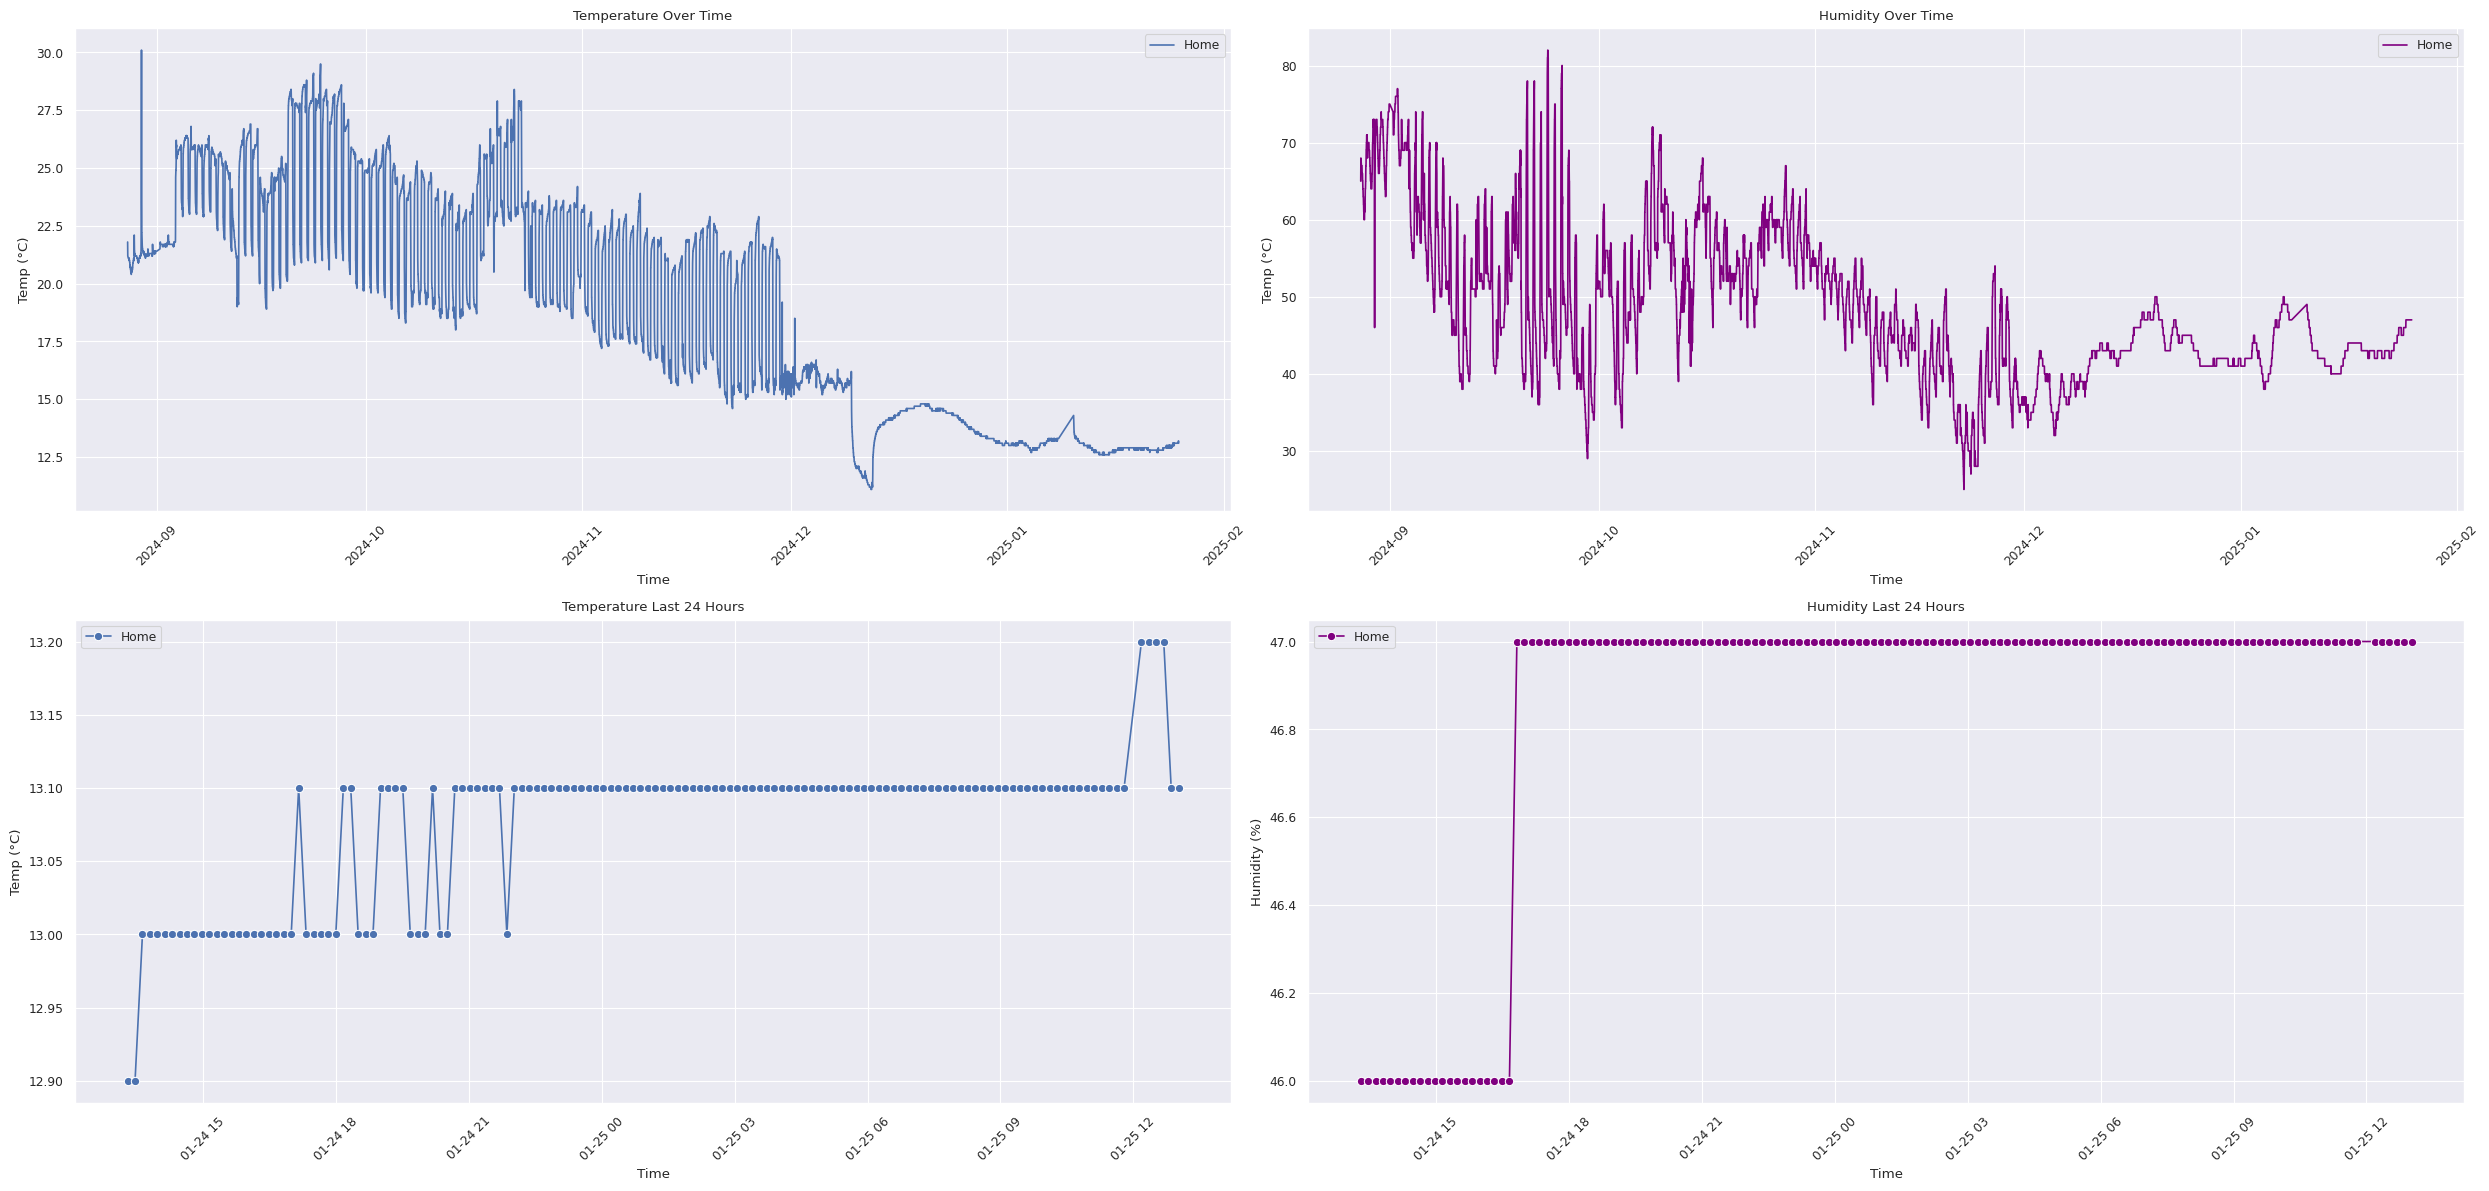

In [9]:
draw_complete_summary([PlotData(SupportedDataFrames.Main, df, {})])

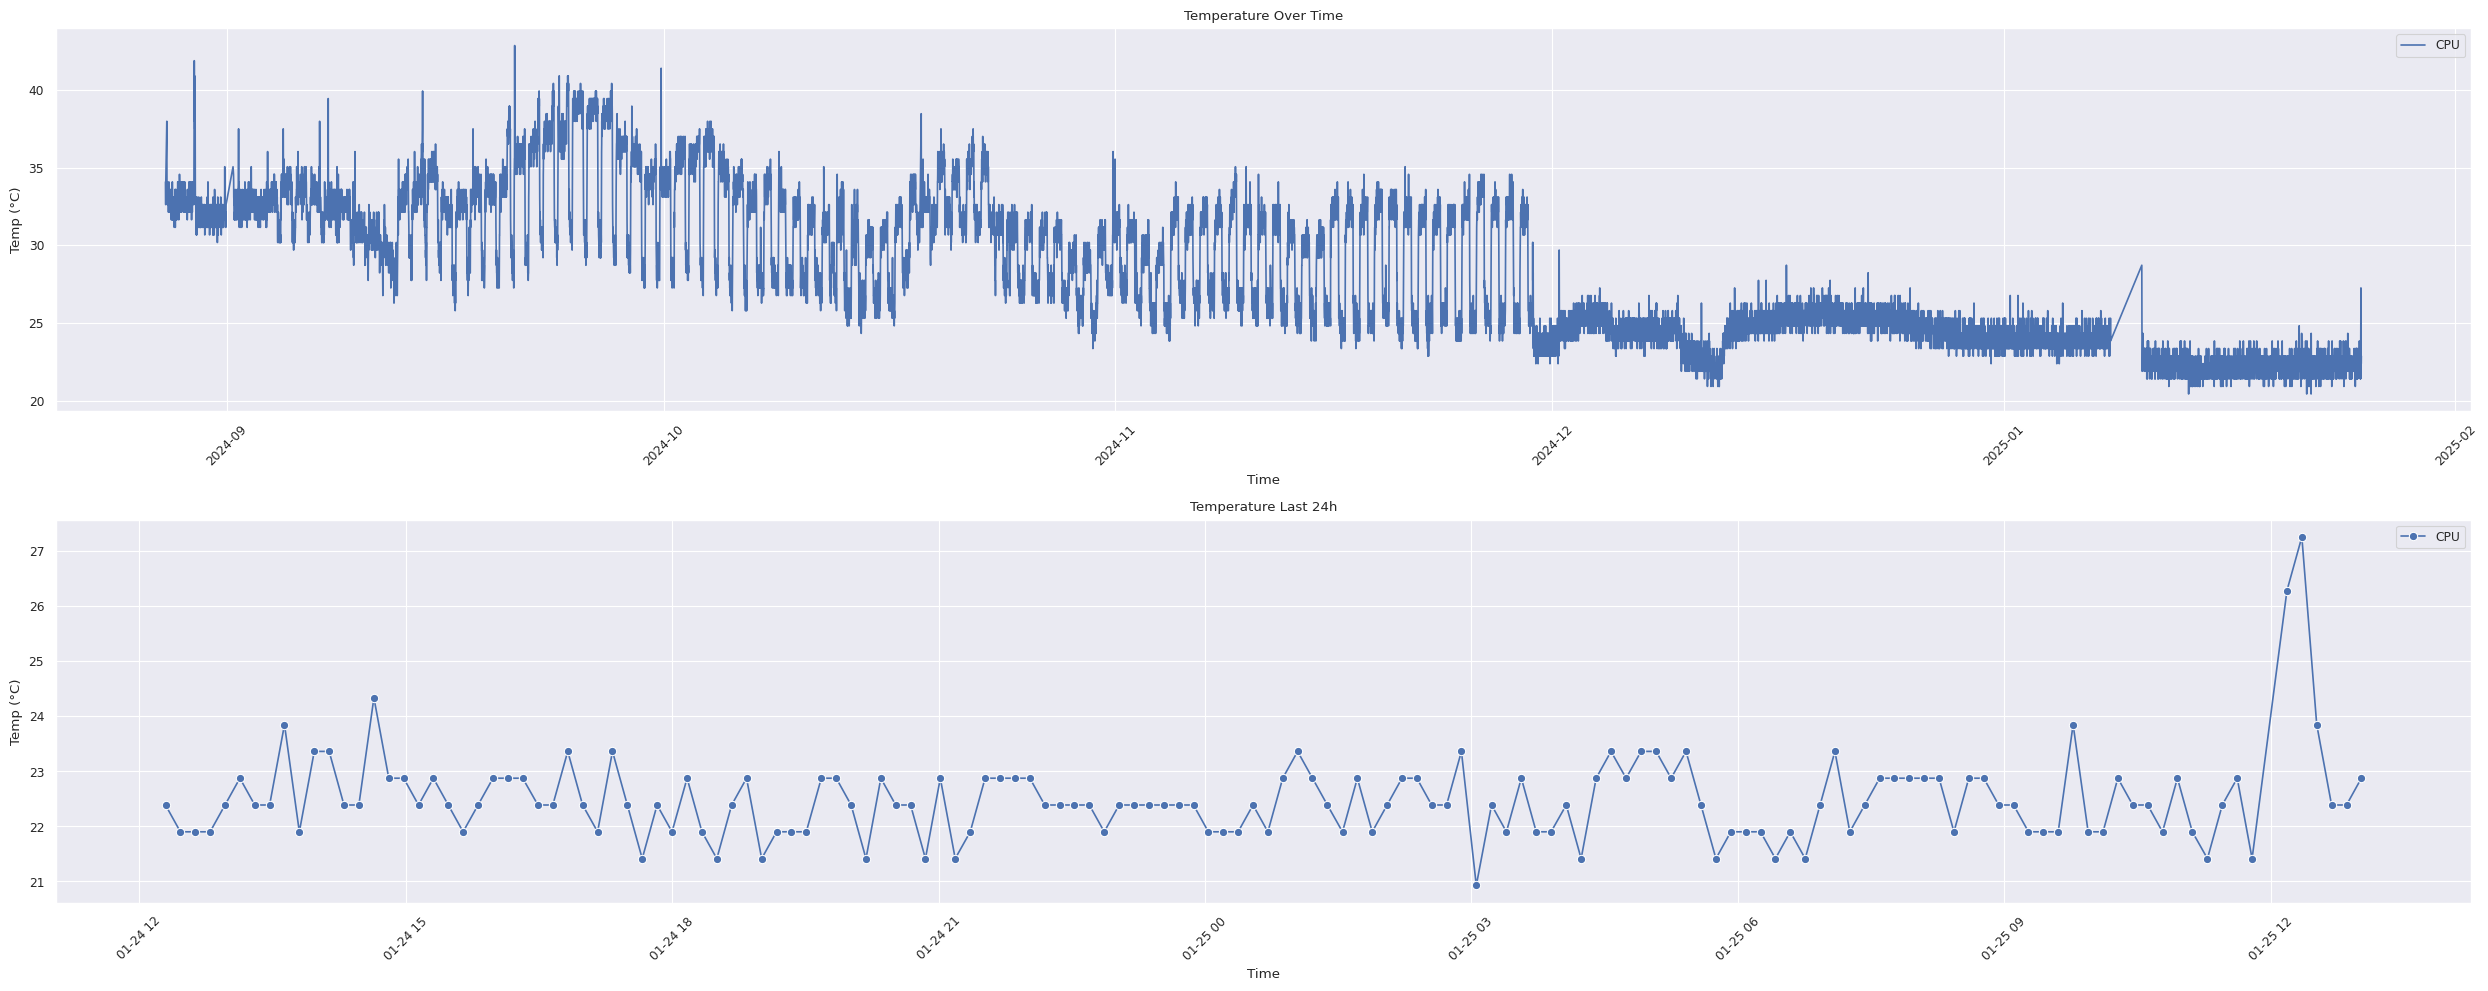

In [10]:
def foo():
    plt.figure(figsize=(25, 10))
    plt.subplot(2, 1, 1)

    sns.lineplot(label="CPU", x="timestamp", y="cpu_temp", data=df)
    plt.title("Temperature Over Time")
    plt.xlabel("Time")
    plt.ylabel("Temp (°C)")
    plt.legend()
    plt.xticks(rotation=45)

    plt.subplot(2, 1, 2)
    sns.lineplot(label="CPU", x="timestamp", y="cpu_temp",marker='o',markersize=6, data=df[df["timestamp"] >= datetime.now() - timedelta(hours=25)])
    plt.title("Temperature Last 24h")
    plt.xlabel("Time")
    plt.ylabel("Temp (°C)")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

foo()
#df